<a href="https://colab.research.google.com/github/kkewat/Neural-Networks/blob/main/Gold_Price_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the basic needed libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

importing the tensoflow libraries for building the ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

importing the dataset

In [ ]:
df = pd.read_csv('gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


In the above GLD is our traget variable as it contains the Gold Price that we want to predict and the rest are the features we are going to use

In [ ]:
# Seperating the independent and dependent Variables

X = df[['SPX','USO','SLV','EUR/USD']]
y = df['GLD']

Spliting the dataset into train test set

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2)

Scaling the Data

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.fit_transform(test_x)

initializing the model

In [ ]:
model = Sequential()

Adding the layers in the model

In [ ]:
model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

Compiling the model

In [ ]:
model.compile(loss="mean_squared_error",optimizer='Adam')

Fiting the features in the Model

In [ ]:
history = model.fit(train_x_scaled,train_y,epochs=50, validation_split=0.1)

Epoch 1/50
52/52 [==============================] - 1s 6ms/step - loss: 15591.2412 - val_loss: 15614.9834
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 15529.3887 - val_loss: 15524.8994
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 15401.4492 - val_loss: 15352.2295
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 15160.2051 - val_loss: 15027.6113
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 14721.4883 - val_loss: 14462.6016
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 14019.1406 - val_loss: 13618.7285
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 13036.2910 - val_loss: 12488.4941
Epoch 8/50
52/52 [==============================] - 0s 2ms/step - loss: 11656.3652 - val_loss: 10842.8193
Epoch 9/50
52/52 [==============================] - 0s 3ms/step - loss: 9871.0469 - val_loss: 8942.1084
Epoch 10/50
52/52 [=============================

Presicting the test data

In [ ]:
y_pred = model.predict(test_x_scaled)

15/15 [==============================] - 0s 2ms/step


Evaluating the model score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_y, y_pred)

0.7811178174603037

Visualising the results

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

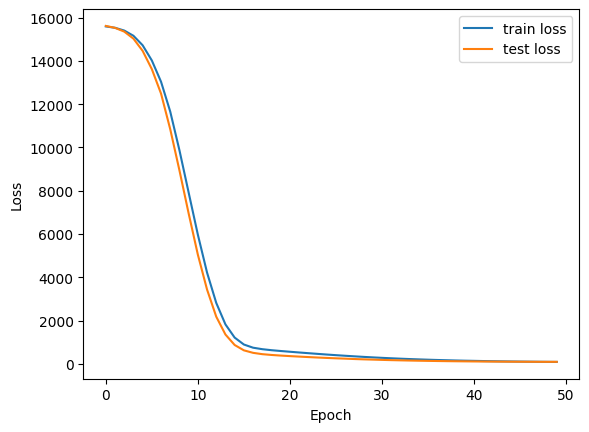

In [ ]:
# prompt: visualise the findings of the model

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
